<a href="https://colab.research.google.com/github/adeiltonmsantos/ValidateReport/blob/main/validate_reports.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1><u><b>Validate Reports</b></u></h1></center>

Esta aplicação se destina à avaliação de erros detectados em laudos de exames quantitativos de mercadorias pré-embaladas, para determinar se as mercadorias devem ou não serem <b>apreendidas</b>. O usuário deve fazer o upload do(s) laudos(s) reprovado(s) e em seguida a aplicação:

- Extrai todas as informações necessárias dos PDFS
- Avalia se cada mercadoria deve ou não ser apreendida de acordo com a norma INMETRO vigente
- Se a aplicação detectar erros passíveis de apreensão, é gerado ao final uma folha de despacho em PDF para anexar no processo com as avaliações realizadas

Os itens de 1 a 6 abaixo são para configuração da folha de despacho a ser anexada no processo. O item 6 é para geração da citada folha

## **1. Definição do cabeçalho da folha de despacho**

O cabeçalho do despacho deve exibir:

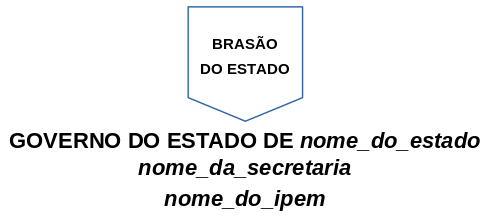

Descrição dos campos:

- <strong><em>nome_do_estado</em></strong>: nome do estado por extenso
- <strong><em>nome_da_secretaria</em></strong>: nome da secretaria ao qual o IPEM está subordinado
- <strong><em>nome_do_ipem</em></strong>: nome do IPEM por extenso

Esses campos só precisam ser editados uma vez.

In [1]:
# @title Preencha os campos do Cabeçalho e em seguida pressione o botão PLAY abaixo
import os
import time
from IPython.display import clear_output
from google.colab import drive

drive.mount('/content/drive', force_remount=True)

main_url = '/content/drive/MyDrive/Colab Notebooks/validate_reports'

if not os.path.exists(main_url):
  os.mkdir(main_url)
os.chdir('/content/drive/MyDrive/Colab Notebooks/validate_reports')

nome_do_estado = "" # @param {"type":"string"}
nome_da_secretaria = "" # @param {"type":"string"}
nome_do_ipem = "" # @param {"type":"string"}

# Criando JSON com os dados acima se todos estiverem preenchidos
salva_json = len(nome_do_estado)>0 and len(nome_da_secretaria)>0 and len(nome_do_ipem)>0

if salva_json:
  import json

  data = {
      "nome_do_estado": nome_do_estado,
      "nome_da_secretaria": nome_da_secretaria,
      "nome_do_ipem": nome_do_ipem
  }

  with open(main_url + '/header.json', 'w') as f:
    json.dump(data, f)
  print('----------------------------------------------------')
  print('-----      CABEÇALHO SALVO COM SUCESSO!        -----')
  print('----------------------------------------------------')
else:
  print('----------------------------------------------------')
  print('----- VOCÊ DEVE PREENCHER TODOS OS CAMPOS PARA -----')
  print('-----           ATUALIZAR O CABEÇALHO          -----')
  print('----------------------------------------------------')

time.sleep(3)
clear_output()

## **2. Upload de brasão do Estado para o cabeçalho da folha de despacho**

<strong>Opcionalmente</strong> você pode fazer o upload de uma imagem com o brasão do estado para aparecer no cabeçalho no formato **png** para servir de marca d'água

In [ ]:
# @title Clique no botão PLAY abaixo para fazer o upload
from google.colab import files
from IPython.display import clear_output
import os
import time
import shutil
from google.colab import drive

main_url = '/content/drive/MyDrive/Colab Notebooks/validate_reports/'
drive.mount('/content/drive', force_remount=True)

ocorreu_erro = False

print('---------------------------------------------------------------------------------------')
print('                         Upload de imagem com BRASÃO do Estado                         ')
print('---------------------------------------------------------------------------------------')
print('Pressione o botão "Procurar" abaixo para localizar o arquivo png com o brasão do Estado')
print('---------------------------------------------------------------------------------------')
try:
  brasao_estado = files.upload()
except Exception:
  ocorreu_erro = True

time.sleep(3)
clear_output()

if ocorreu_erro:
  print('----------------------------------------------------------')
  print('                 ERRO INTERNO DO COLAB')
  print('----------------------------------------------------------')
  print('  Ocorreu algum erro interno no Google Colab. Clique no')
  print('  menu  "Ambiente de execução" e  em seguida  clique em')
  print('  "Desconectar  e   excluir   ambiente   de   execução".')
  print('  Depois clique no botão PLAY novamente')
  print('----------------------------------------------------------')
else:
  # Armazenando o nome do arquivo em uma variável
  brasao_file = list(brasao_estado.keys())[0]

  time.sleep(3)
  clear_output()

  # Verificando se a imagem é realmente png
  tipo = brasao_file.split('.')[-1]
  if tipo in ['png', 'jpg', 'jpeg', 'bmp']:
    if not os.path.exists(f'{main_url}/img'):
      os.mkdir(f'{main_url}/img')
    shutil.move(f'/content/{brasao_file}', f'{main_url}/img/brasao.png')
    print('-------------------------------------------------------')
    print('-----      BRASÃO DO ESTADO SALVO COM SUCESSO!    -----')
    print('-------------------------------------------------------')
  else:
    print('-------------------------------------------------------------------')
    print('                  FORMATO DE ARQUIVO INVÁLIDO')
    print('-------------------------------------------------------------------')
    print(' Só é permitido upload de arquivos "png", "jpg", "jpeg" ou "bmp".')
    print('-------------------------------------------------------------------')


## **3. Upload de assinatura do responsável da folha de despacho**

**Opcionalmente** você pode fazer o upload de uma imagem **png** com a assinatura. Use uma imagem conforme o modelo abaixo, com rubrica, nome e cargo do responsável

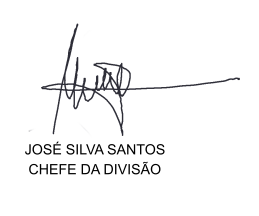

In [ ]:
# @title Clique no botão PLAY abaixo e faça o upload de uma imagem png com sua assinatura
from google.colab import files
from IPython.display import clear_output
import os
import time
import shutil
from google.colab import drive

main_url = '/content/drive/MyDrive/Colab Notebooks/validate_reports/'
drive.mount('/content/drive', force_remount=True)

ocorreu_erro = False

try:
  print('---------------------------------------------------------------------------------------')
  print('                          Upload de imagem para sua assinatura                         ')
  print('---------------------------------------------------------------------------------------')
  print('         Pressione o botão "Procurar" abaixo para localizar um arquivo png')
  print('---------------------------------------------------------------------------------------')
  assinat = files.upload()
except Exception:
  ocorreu_erro = True

time.sleep(3)
clear_output()

if ocorreu_erro:
  print('----------------------------------------------------------')
  print('                 ERRO INTERNO DO COLAB')
  print('----------------------------------------------------------')
  print('  Ocorreu algum erro interno no Google Colab. Clique no')
  print('  menu  "Ambiente de execução" e  em seguida  clique em')
  print('  "Desconectar  e   excluir   ambiente   de   execução".')
  print('  Depois clique no botão PLAY novamente')
  print('----------------------------------------------------------')
else:
  # Armazenando o nome do arquivo em uma variável
  assinat_file = list(assinat.keys())[0]

  time.sleep(3)
  clear_output()

  # Verificando se a imagem é realmente png
  tipo = assinat_file.split('.')[-1]
  if tipo in ['png', 'jpg', 'jpeg', 'bmp']:
    if not os.path.exists(f'{main_url}/img'):
      os.mkdir(f'{main_url}/img')
    shutil.move(f'/content/{assinat_file}', f'{main_url}/img/assinatura.png')
    print('------------------------------------------------------------')
    print('              ASSINATURA  SALVA COM SUCESSO!')
    print('------------------------------------------------------------')
  else:
    print('-------------------------------------------------------------------')
    print('                  FORMATO DE ARQUIVO INVÁLIDO')
    print('-------------------------------------------------------------------')
    print(' Só é permitido upload de arquivos "png", "jpg", "jpeg" ou "bmp".')
    print('-------------------------------------------------------------------')


## **4. Upload de marca d'água para a folha de despacho**

**Opcionalmente** você pode fazer o upload de uma imagem **png** semitransparente para servir de marca d'água

In [ ]:
# @title Clique no botão PLAY abaixo e faça o upload de uma imagem png semitransparente para marca d'água
from google.colab import files
from IPython.display import clear_output
import os
import time
import shutil
from google.colab import drive

main_url = '/content/drive/MyDrive/Colab Notebooks/validate_reports/'
drive.mount('/content/drive', force_remount=True)

ocorreu_erro = False

try:
  print('---------------------------------------------------------------------------------------')
  print('                          Upload de imagem para marca d\'água                         ')
  print('---------------------------------------------------------------------------------------')
  print('         Pressione o botão "Procurar" abaixo para localizar um arquivo png')
  print('---------------------------------------------------------------------------------------')
  marca = files.upload()
except Exception:
  ocorreu_erro = True

time.sleep(3)
clear_output()

if ocorreu_erro:
  print('----------------------------------------------------------')
  print('                 ERRO INTERNO DO COLAB')
  print('----------------------------------------------------------')
  print('  Ocorreu algum erro interno no Google Colab. Clique no')
  print('  menu  "Ambiente de execução" e  em seguida  clique em')
  print('  "Desconectar  e   excluir   ambiente   de   execução".')
  print('  Depois clique no botão PLAY novamente')
  print('----------------------------------------------------------')
else:
  # Armazenando o nome do arquivo em uma variável
  marca_file = list(marca.keys())[0]

  time.sleep(3)
  clear_output()

  # Verificando se a imagem é realmente png
  tipo = marca_file.split('.')[-1]
  if tipo == 'png':
    if not os.path.exists(f'{main_url}/img'):
      os.mkdir(f'{main_url}/img')
    shutil.move(f'/content/{marca_file}', f'{main_url}/img/marca_dagua.png')
    print('-------------------------------------------------------')
    print('-----        MARCA D\'ÁGUA SALVA COM SUCESSO!     -----')
    print('-------------------------------------------------------')
  else:
    print('-------------------------------------------------------------------')
    print('                  FORMATO DE ARQUIVO INVÁLIDO')
    print('-------------------------------------------------------------------')
    print('           Só é permitido upload de arquivos "png"')
    print('-------------------------------------------------------------------')

## **5. Avaliando laudos reprovados**

Defina a data da avaliação abaixo e clique no botão PLAY. A aplicação vai exibir um controle para UPLOAD de laudos reprovados em seu computador

**Observação**: preenchendo nome_responsavel e cargo_responsavel, mesmo que haja imagem com assinatura, serão exibidos nome_responsavel e cargo_responsavel

In [14]:
# @title Clique no botão PLAY abaixo e aguarde aparecer o botão para fazer o upload do(s) laudo(s)
!pip install fpdf2
!pip install -q pdfplumber

from fpdf import FPDF
import pandas as pd
import os
import time
import datetime as dt
import json
import shutil
from PIL import Image
from IPython.display import clear_output

import pdfplumber as p
from google.colab import files, drive
import pandas as pd

# Conectando à conta Google Drive
main_url = '/content/drive/MyDrive/Colab Notebooks/validate_reports'
drive.mount('/content/drive', force_remount=True)

# Criando a pasta da aplicação no Google Drive, se não exisitir
if not os.path.exists(main_url):
  os.mkdir(main_url)

# Se não houver um ipynb na pasta do Google Drive, move este arquivo em
# execução para lá
if not os.path.exists(f'{main_url}/validate_reports.ipynb'):
  ipynb_file = '/content/drive/MyDrive/Colab Notebooks/validate_reports.ipynb'
  shutil.move(ipynb_file, f'{main_url}/')


class Laudo():
  """
  classe Laudo(): Instancia um laudo genérico. Deve ser instanciada apenas para
  extração de dados com o método 'loadRawData()' e determinar o tipo de exame do
  laudo ('m': massa, 'v': volume: 'c': comprimento/largura/altura ou'u': unidade).
  Demais ações devem ser realizadas com suas classes filha: LaudoMassa,
  LaudoVolume, LaudoComp ou LaudoUnid.

  """

  def __init__(self):
    self.num_laudo = None
    self.tipo_exame = None
    self.nome_prod = None
    self.marca_prod = None
    self.qn_prod = None
    self.unid_prod = None
    self.unid_exame = None
    self.data_exame = None
    self.n = None
    self.c = None
    self.T = None
    self.T3 = None
    self.total_defeituosos = None
    self.total_T3 = None
    self.valor_min_indiv = None
    self.valor_erro_T3 = None
    self.media_min = None
    self.perc_defeituosos = None
    self.list_raw_data = []
    # String para extrair informações do produto (nome, marca, Qn)
    self._string1 = None
    # String para extrair n, c e T
    self._string2 = None
    # String para extrair n.º defeituosas encontradas e média mínima
    self._string3 = None
    # Lista com linhas das string de medições
    self.lista_medicoes = []
    # DataFrame Pandas com as medições de 'lista_medicoes'
    self.df_medicoes = None

  # Carrega para a propriedade list_raw_data o conteúdo bruto do PDF do laudo
  def loadRawData(self, url_laudo):

    # Resetando dados de laudo anterior
    self.__init__()

    # Carregando todo o conteúdo do laudo
    pdf = p.open(url_laudo)

    # Extraindo as páginas para um iterável
    pgs = pdf.pages

    # Lista para receber todas as linhas das tabelas do PDF
    tbls = []

    # Varrendo todas as páginas para extrair as tabelas
    for pg in pgs:
      tbls += pg.extract_tables()

    # Varrendo as tabelas para extrair suas linhas para list_raw_data
    for tb in tbls:
      for row in tb:
        self.list_raw_data.append(row)

  # Retorna o tipo de exame e o atribui à 'tipo_exame'
  def getTipoExame(self):
    if self.tipo_exame is None:
      self._getString1()
      STRING = self._string1

      try:
        string = self._getValueBetweenStrings(STRING, 'Conteúdo Nominal: ', ' Massa Específica')
        lst = string.split(' ')
        cod = lst[1][-1].lower()

        match cod:
          case 'g':
            self.tipo_exame = 'm'
          case 'l':
            self.tipo_exame = 'v'
          case 'm':
            self.tipo_exame = 'c'

      except Exception:
        self.tipo_exame = 'u'

      return self.tipo_exame

  # Método protegido que dada uma string chave 'str_key' varre list_raw_data em
  # busca da string que a contém
  def _getDataByString(self, str_key):
    for item in self.list_raw_data:
      for row in item:
        if row is not None and str_key in row:
          return row
    return None

  # Método protegido utilizado para obter os dados do laudo (produto, marca, qn,
  # n, c, T, etc.). Extrai uma substring de uma string maior. Deve-se fornecer
  # um trecho antes e depois da substring (str_start e str_end) para extraí-la
  def _getValueBetweenStrings(self, string, str_start, str_end):
    i_0 = string.index(str_start) + len(str_start)
    i_1 = string.index(str_end)
    return string[i_0: i_1]

  # Carrega para a propriedade 'string1' a string da qual serão extraídos dados
  # do produto (nome, marca, Qn)
  def _getString1(self):
    if self._string1 is None:
      data = self._getDataByString('Produto: ')
      self._string1 = data

  # Carrega para a propriedade 'string2' a string da qual serão extraídos n, c,
  # e T
  def _getString2(self):
    if self._string2 is None:
      data = self._getDataByString('Faixa do Lote:')
      self._string2 = data

  # Carrega para a propriedade 'string3' a string da qual serão extraídos
  # n.º defeituosas encontradas e média mínima
  def _getString3(self):
    if self._string3 is None:
      data = self._getDataByString('Defeituosas Encontradas: ')
      self._string3 = data

  # Carrega para a propriedade 'lista_medicoes' uma lista com as medições do
  # exame como string. Deve ser sobrescrita por cada classe filha para as
  # devidas adapatações
  def _getListaMedicoes(self):
    data = self.list_raw_data
    linhas_com_medicoes = False

    for row in data:
      if row[0] is not None and 'Valor da menor unidade:' in row[0]:
        linhas_com_medicoes = False
      if row[0] is not None and 'Observação' in row[0]:
        linhas_com_medicoes = False
      if row[0] is not None and 'Observações' in row[0]:
        linhas_com_medicoes = False
      if row[0] is not None and 'Produto: ' in row[0]:
        linhas_com_medicoes = False
      if linhas_com_medicoes and len(row[0]) > 2:
        self.lista_medicoes.append(row[0])
      if row[0] is not None and 'Unidade nº ' in row[0]:
        linhas_com_medicoes = True

    return self.lista_medicoes

  # Transforma o conteúdo de lista_medicoes em dataframe Pandas
  def getMedicoesDataFrame(self):
    """
    Transforma o conteúdo de 'lista_medicoes' em um dataframe Pandas
    (df_medicoes). Retorna o dataframe
    """

    # Carregando 'lista_medicoes'
    if self.lista_medicoes == []:
      data = self._getListaMedicoes()
    else:
      data = self.lista_medicoes

    # Transformando 'lista_medicoes' em dataframe Pandas
    self.df_medicoes = pd.DataFrame(data, columns=['Cont_liq', 'Defeituosos'])
    return self.df_medicoes


  # Carrega dados do produto (nome_prod, marca_prod, qn_prod)
  def loadProdData(self):
    self._getString1()
    string = self._string1

    # nome_prod
    try:
      self.nome_prod = self._getValueBetweenStrings(string.upper(), 'PRODUTO: ', ' CÓDIGO: ')
    except Exception:
      self.nome_prod = None

    # marca_prod
    try:
      self.marca_prod = self._getValueBetweenStrings(string.upper(), 'MARCA: ', ' FATOR DE CORREÇÃO:')
    except Exception:
      self.marca_prod = None

    # qn_prod, unid_prod
    try:
      str_qn = self._getValueBetweenStrings(string.upper(), 'CONTEÚDO NOMINAL: ', ' MASSA ESPECÍFICA').lower()
      lst_qn = str_qn.split(' ')
      self.qn_prod = lst_qn[0]
      self.unid_prod = lst_qn[1]
    except Exception:
      self.qn_prod = None
      self.unid_prod = None

    # unid_exame
    try:
      self._getString3()
      string = self._string3
      str_un_ex = self._getValueBetweenStrings(string.upper(), 'VALOR MÍN. INDIVIDUAL: ', '\nRESULTADO')
      lst_un_ex = str_un_ex.split(' ')
      self.unid_exame = lst_un_ex[1].lower()
    except Exception:
      self.unid_exame = None

    # data_exame e num_laudo
    rows = self.list_raw_data
    for row in rows:
      # 'Data e Hora do Exame: 08/01/2025 11h00min'
      if row[1] is not None and 'Data e Hora do Exame:' in row[1]:
        lst_date = row[1].split(' ')
        self.data_exame = lst_date[5]
      if row[2] is not None and 'Data e Hora do Exame:' in row[2]:
        lst_date = row[2].split(' ')
        self.data_exame = lst_date[5]
      for item in row:
        if item is not None and 'NÚMERO DO LAUDO:' in item.upper():
          lst_num = item.split(' ')
          self.num_laudo = lst_num[3]

    # c
    try:
      self._getString2()
      string = self._string2

      str1 = 'DEFEITUOSAS ACEITÁVEIS (C): '
      str2 = '\nTOLERÂNCIA'
      self.c = self._getValueBetweenStrings(string.upper(), str1, str2).lower()
    except Exception:
      self.c = None

    # n
    try:
      str1 = 'AMOSTRA: '
      str2 = ' UNIDADE(S)'
      self.n = int(self._getValueBetweenStrings(string.upper(), str1, str2))
    except Exception:
      self.n = None

    # total_defeituosos
    try:
      self._getString3()
      string = self._string3
      str1 = 'DEFEITUOSAS ENCONTRADAS: '
      str2 = '\nVALOR'
      self.total_defeituosos = int(self._getValueBetweenStrings(string.upper(), str1, str2))
    except Exception:
      self.total_defeituosos = None;

    # valor_min_indiv (Qn - T)
    try:
      self._getString3()
      string = self._string3
      str1 = 'VALOR MÍN. INDIVIDUAL: '
      str2 = ' G'
      strV = self._getValueBetweenStrings(string.upper(), str1, str2)
      strV = strV.replace(',', '.')
      self.valor_min_indiv = float(strV)
    except Exception:
      self.valor_min_indiv = None

    # T
    try:
      self._getString2()
      string = self._string2
      str1 = 'TOLERÂNCIA INDIVIDUAL: '
      str2 = ' G'
      strT = self._getValueBetweenStrings(string.upper(), str1, str2)
      strT = strT.replace(',', '.')
      self.T = float(strT)
    except Exception:
      self.T = None

    # perc_defeituosos
    df = self.total_defeituosos
    n = self.n
    self.perc_defeituosos = int((df * 100)/n)

  # Calcula 'total_T3' e 'valor_erro_T3'. Só deve ser chamado pelo método
  # 'loadProdData' nas classes filhas
  def _getValoresT3(self):
    # valor_erro_T3
    self.valor_erro_T3 = float(self.valor_min_indiv - 2 * self.T)

    # total_T3
    df = self.getMedicoesDataFrame()
    df_def = df.query('Cont_liq < @self.valor_erro_T3')
    self.total_T3 = len(df_def)

  def getErrosTxt(self):
    """
    getErrosTxt(): Retorna uma string com os erros encontrados no laudo. Só deve
    ser chamada após o método 'loadProdData' ser chamado. Retorna '' (string
    vazia) se não houver erros. Se houver erros, retorna uma string com os erros
    encontrados.
    """

    # Percentual de erro T1
    perc_T1 = self.perc_defeituosos

    # Total de erros T3
    total_T3 = self.total_T3

    # Texto a ser definido se houver erros
    txt_erros = f'o produto {self.nome_prod.upper()}, marca {self.marca_prod.upper()}, examinad'
    txt_erros += f'o em nosso laboratório em {self.data_exame} é passível de a'
    txt_erros += f'preensão pois referente ao conteúdo nominal {self.qn_prod} '
    txt_erros += f'{self.unid_exame} determinado no laudo n.º {self.num_laudo} '

    # Montando o texto se houver os dois erros
    if perc_T1 > 30 and total_T3 > 0:
      txt_erros += "apresenta pelo menos uma unidade amostral com déficit de conteúdo "
      txt_erros += "efetivo três vezes maior que o estabelecido pelo RTM em vigor e apr"
      txt_erros += f"esenta {perc_T1}% de unidades amostrais com erro individual (o li"
      txt_erros += "mite para apreensão é 30%)"
    # Montando o texto só com o erro T3
    elif not perc_T1 > 30 and total_T3:
      txt_erros += "apresenta pelo menos uma unidade amostral com déficit de conteúdo "
      txt_erros += "efetivo três vezes maior que o estabelecido pelo RTM em vigor"
    # Montando o texto só com o erro T1
    elif perc_T1 > 30 and not total_T3:
      txt_erros += f"apresenta {perc_T1}% de unidades amostrais com erro individual (o"
      txt_erros += " limite para apreensão é 30%)"

    return txt_erros


class LaudoMassa(Laudo):
  def __init__(self):
    super().__init__()

  # Sobrescreve 'loadProdData' apenas para calcular 'valor_erro_T3'
  def loadProdData(self):

    # Chamando o método da classe pai. Em seguida é carregado o que o método da
    # classe pai não é capaz de carregar
    super().loadProdData()

    # Chamando método da classe pai para carregar os valores 'valor_erro_T3' e
    # 'total_T3'
    super()._getValoresT3()

  # Sobrescreve _getListaMedicoes() da classe pai para extrair os dados das strings
  def _getListaMedicoes(self):
    # Carregando 'lista_medicoes' com o método da classe pai
    super()._getListaMedicoes()

    # Atribuindo lista_medicoes 'bruta' à lista 'rows'
    rows = self.lista_medicoes
    lst_tmp = []

    # Varrendo rows
    for row in rows:

      # Atribuindo row a lst sem o índice (unidade amostral)
      lst = row.split(' ')[1:]

      # Subsituindo as vírgulas das strings por ponto
      lst = [x.replace(',', '.') for x in lst]

      # Transformando todas as strings em float
      lst = [float(x) for x in lst]

      # Se o último item de lst for negativo (nº defeituosos), atribui a lst_tmp
      # o último e penúltimo itens de lst
      size = len(lst)
      if lst[size-1] < 0:
        lst_tmp.append([lst[size-2], lst[size-1]])

      # O último item é positivo (peso líquido). Acrescenta o último item e o
      # valor zero (nenhum defeituoso)
      else:
        lst_tmp.append([lst[size-1], 0])

    self.lista_medicoes = lst_tmp
    return self.lista_medicoes


class LaudoVolume(Laudo):
  def __init__(self):
    super().__init__()

  # Sobrescreve o método 'loadProdData' p/ carregar 'T' e 'valor_min_indiv' que
  # não são carregados na classe pai
  def loadProdData(self):

    # Chamando o método da classe pai. Em seguida é carregado o que o método da
    # classe pai não é capaz de carregar
    super().loadProdData()

    # T
    self._getString2()
    string = self._string2
    str1 = 'TOLERÂNCIA INDIVIDUAL: '
    str2 = ' M'
    strT = self._getValueBetweenStrings(string.upper(), str1, str2)
    strT = strT.replace(',', '.')
    self.T = float(strT)

    # valor_min_indiv (Qn - T)
    self._getString3()
    string = self._string3
    str1 = 'VALOR MÍN. INDIVIDUAL: '
    str2 = ' ML'
    strV = self._getValueBetweenStrings(string.upper(), str1, str2)
    strV = strV.replace(',', '.')
    self.valor_min_indiv = float(strV)

    # Chamando método da classe pai para carregar os valores 'valor_erro_T3' e
    # 'total_T3'
    super()._getValoresT3()


  # Sobrescreve _getListaMedicoes() da classe pai para extrair os dados das strings
  def _getListaMedicoes(self):
    # Carregando 'lista_medicoes' com o método da classe pai
    super()._getListaMedicoes()

    # Atribuindo lista_medicoes 'bruta' à lista 'rows'
    rows = self.lista_medicoes
    lst_tmp = []

    # Varrendo rows
    for row in rows:

      # Atribuindo row a lst sem o índice (unidade amostral)
      lst = row.split(' ')[1:]

      # Subsituindo as vírgulas das strings por ponto
      lst = [x.replace(',', '.') for x in lst]

      # Transformando todas as strings em float
      lst = [float(x) for x in lst]

      # Se o último item de lst for negativo (nº defeituosos), atribui a lst_tmp
      # o último e penúltimo itens de lst
      size = len(lst)
      if lst[size-1] < 0:
        lst_tmp.append([lst[size-2], lst[size-1]])

      # O último item é positivo (conteúdo líquido). Acrescenta o último item e
      # o valor zero (nenhum defeituoso)
      else:
        lst_tmp.append([lst[size-1], 0])

    self.lista_medicoes = lst_tmp
    return self.lista_medicoes


class LaudoComp(Laudo):
  def __init__(self):
    super().__init__()

  # Sobrescreve o método 'loadProdData' p/ carregar 'unid_exame', 'T' e
  # 'valor_min_indiv' que não são carregados na classe pai
  def loadProdData(self):

    # Chamando o método da classe pai. Em seguida é carregado o que o método da
    # classe pai não é capaz de carregar
    super().loadProdData()

    # unid_exame
    self._getString3()
    string = self._string3
    str_un_ex = self._getValueBetweenStrings(string.upper(), 'VALOR MÍN. ACEITÁVEL: ', '\nRESULTADO')
    lst_un_ex = str_un_ex.split(' ')
    self.unid_exame = lst_un_ex[1].lower()

    # T
    self._getString2()
    string = self._string2
    str1 = 'TOLERÂNCIA INDIVIDUAL: '
    str2 = ' CM'
    try:
      strT = self._getValueBetweenStrings(string.upper(), str1, str2)
    except Exception:
      strT = self._getValueBetweenStrings(string.upper(), str1, ' MM')
    strT = strT.replace(',', '.')
    self.T = float(strT)

    # valor_min_indiv (Qn - T)
    self._getString3()
    string = self._string3
    str1 = 'VALOR MÍN. ACEITÁVEL: '
    str2 = ' CM'
    try:
      strV = self._getValueBetweenStrings(string.upper(), str1, str2)
    except Exception:
      strV = self._getValueBetweenStrings(string.upper(), str1, ' MM')
    strV = strV.replace(',', '.')
    self.valor_min_indiv = float(strV)

    # Chamando método da classe pai para carregar os valores 'valor_erro_T3' e
    # 'total_T3'
    super()._getValoresT3()


  # Sobrescreve _getListaMedicoes() da classe pai para extrair os dados das strings
  def _getListaMedicoes(self):
    # Carregando 'lista_medicoes' com o método da classe pai
    super()._getListaMedicoes()

    # Atribuindo lista_medicoes 'bruta' à lista 'rows'
    rows = self.lista_medicoes
    lst_tmp = []

    # Varrendo rows
    for row in rows:

      # Atribuindo row a lst sem o índice (unidade amostral)
      lst = row.split(' ')[1:]

      # Subsituindo as vírgulas das strings por ponto
      lst = [x.replace(',', '.') for x in lst]

      # Transformando todas as strings em float
      lst = [float(x) for x in lst]

      # Se o último item de lst for negativo (nº defeituosos), atribui a lst_tmp
      # o último e penúltimo itens de lst
      size = len(lst)
      if lst[size-1] < 0:
        lst_tmp.append([lst[size-2], lst[size-1]])

      # O último item é positivo (medição). Acrescenta o último item e o valor
      # zero (nenhum defeituoso)
      else:
        lst_tmp.append([lst[size-1], 0])

    self.lista_medicoes = lst_tmp
    return self.lista_medicoes


class LaudoUnid(Laudo):
  def __init__(self):
    super().__init__()

  # Sobrescreve o método 'loadProdData' p/ carregar 'marca_prod', 'qn_prod',
  # 'unid_prod', 'T' e 'valor_min_indiv' que não são carregados na classe pai
  def loadProdData(self):
    self._getString1()
    string = self._string1

    # Chamando o método da classe pai. Em seguida é carregado o que o método da
    # classe pai não é capaz de carregar
    super().loadProdData()

    # marca_prod
    self.marca_prod = self._getValueBetweenStrings(string.upper(), 'MARCA: ', '\nCONTEÚDO NOMINAL')

    # qn_prod
    str_qn = self._getValueBetweenStrings(string.upper(), 'CONTEÚDO NOMINAL (QN):', '\nTEMPERATURA').lower()
    lst_qn = str_qn.split(' ')
    self.qn_prod = lst_qn[0]

    # unid_prod
    self.unid_prod = 'un.'

    # T
    self._getString2()
    string = self._string2
    str1 = 'TOLERÂNCIA INDIVIDUAL: '
    str2 = ' UN.'
    strT = self._getValueBetweenStrings(string.upper(), str1, str2)
    self.T = int(strT)

    # valor_min_indiv (Qn - T)
    self._getString3()
    string = self._string3
    str1 = 'VALOR MÍN. INDIVIDUAL: '
    str2 = ' UN.'
    self.valor_min_indiv = int(self._getValueBetweenStrings(string.upper(), str1, str2))

    # Chamando método da classe pai para carregar os valores 'valor_erro_T3' e
    # 'total_T3'
    super()._getValoresT3()

  # Sobrescreve _getListaMedicoes() da classe pai para extrair os dados das strings
  def _getListaMedicoes(self):
    data = self.list_raw_data
    linhas_com_medicoes = False

    for row in data:
      if row[0] is not None and 'Valor da menor unidade:' in row[0]:
        linhas_com_medicoes = False
      if row[0] is not None and 'Observação' in row[0]:
        linhas_com_medicoes = False
      if row[0] is not None and 'Observações' in row[0]:
        linhas_com_medicoes = False
      if row[0] is not None and 'Produto: ' in row[0]:
        linhas_com_medicoes = False
      if linhas_com_medicoes:# and row[1] is not None and len(row[1]) > 0:
        # Retirando todos os elementos nulos das linhas
        while None in row:
          row.remove(None)
        # Retirando todos os elementos de strings vazias das linhas
        while '' in row:
          row.remove('')
        # Transformando todos os elementos de row em inteiros
        row = [int(x) for x in row]

        # row tem 3 itens (índice, cont. efet. e cont. efet.)
        if len(row) == 3:
          self.lista_medicoes.append(row[2:] + [0])
        # row tem 4 itens  (índice, cont. efet., cont. efet., n.º defeit.)
        elif len(row) == 4:
          self.lista_medicoes.append(row[2:])
      if row[0] is not None and 'UNIDADE AMOSTRAL' in str(row[0]).upper():
        linhas_com_medicoes = True

    return self.lista_medicoes



# Classe PDF
class PDF(FPDF):
  def __init__(self):
    super().__init__()
    self.add_page()
    self.set_font('Helvetica', '', 10)
    self.set_margins(20, 20, 20)
    self.set_xy(20,20)

  # Retorna o limite vertical para quebra de página
  def get_max_y(self):
    return self.h - 2 * self.t_margin

  # Retorna o limite horizontal para ultrapassar margem direita
  def get_max_x(self):
    return self.w - 2 * self.l_margin

  # Renderiza uma imagem no PDF e coloca o cursor abaixo dela
  def renderImage(self, filename, prop_w=None, align=None, y_adic_new_page=None):
    """ image(filename, dim, dim_vl): Define uma imagem no PDF e coloca o cursor abaixo dela.
        O tamanho da imagem deve ser definido em relação à largura da página. O parâmetro
        'prop_w' é um valor entre 0 e 100 que corresponde ao percentual da largura da página
        que a imagem deve ocupar. Sua altura é automaticamente definida com base na proporção
        entre altura e largura da própria imagem

    Args:
      - filename (obrigatório): Nome do arquivo da imagem
      - prop_w (opcional): valor entre 0 e 100 que corresponde ao percentual da largura da
                         página que a imagem deve ocupar. Sua altura é automaticamente
                         definida com base na proporção entre altura e largura da própria
                         imagem. Se não for informado, usa 100% da largura da página
      - align (opcional): alinhamento da imagem que pode ser 'C', 'L' ou 'R'. Se não for
                          informado alinha ao centro
      - y_adic_new_page (opcional): incremento para a posição vertical, caso a imagem
                                    ultrapasse a margem inferior da página e seja
                                    renderizada na próxima página
    """

    y = self.get_y()

    # Para obter as dimensõres reais da imagem em pixels
    img = Image.open(filename)

    # Capturando as dimensões da imagem
    W_img, H_img = img.size

    # Razão entre largura e altura
    W_H = W_img/H_img

    # Largura da página descontando as margens
    W_pg = self.w - self.l_margin - self.r_margin

    # Altura da página descontando as margens
    H_pg = self.get_max_y() - self.t_margin

    # Dimensões da imagem em milímetros
    if prop_w is None:
      prop_w = 100
    W_img = W_pg * prop_w / 100
    H_img = W_img / W_H

    # Se a base da imagem ultrapassar a margem inferior, quebra a página
    # Posição y da base da imagem na página
    Y = y + H_img
    # Coordenada y que é o limite para ultrapassar a margem inferior
    Y_lim = self.h - self.t_margin - self.b_margin
    if Y > Y_lim:
      self.add_page()
      y = self.t_margin if y_adic_new_page is None else y_adic_new_page + self.t_margin


    # Posicionando o cursor de acordo com o parâmetro 'align'
    match align:
      case 'L':
        x_img = self.l_margin
      case 'R':
        x_img = self.w - self.r_margin - W_img
      case 'C':
        x_img = self.l_margin + (self.w - self.l_margin - self.r_margin - W_img) / 2
      case _:
        x_img = self.l_margin + (self.w - self.l_margin - self.r_margin - W_img) / 2
        self.set_x(x_img)

    # Renderizando a imagem de acordo com a largura
    self.image(filename, w=W_img, y=y, x=x_img)

    # Posicionando o cursor abaixo da imagem
    self.set_y(y + H_img)


  # Renderiza uma tabela a partir de uma DataFrame Pandas
  def renderTableFromPandas(self, df, options):
    """ renderTableFromPandas(df, options): Renderiza uma tabela a partir de uma DataFrame Pandas.

    Args:
      df: DataFrame Pandas com os dados da tabela
      options: Dicionário com os parâmetros da tabela

        As seguintes chaves devem ser informadas no dicionário options:

        'h' (obrigatório): altura mínima de cada linha
        'cols' (obrigatório): lista com os nomes das colunas utilizadas de 'df'
        'tbl_w_per' (optional): largura da tabela em percentual da largura da página
        'labels' (optinal): lista com os rótulos da tabela. Se não for informado usa 'cols'
        'cols_w' (optional): lista com as larguras das colunas em % da largura da tabela. Usa 100% se não for informado
        'align' (opcional): alinhamento da tabela. Pode ser 'L', 'C' ou 'R'. Se for omitido, alinha ao centro

    """

    warning = 'Os parâmetros obrigatórios não foram definidos no dicionário "options":'
    warning += ' cols (lista com rótulos das colunas), tbl_w_perc (largura da tabela'
    warning += ' em % da página)'

    try:

      # Definindo a altura mínima das linhas da tabela
      h = options.get('h', None)
      if h is None:
        raise KeyError('A altura mínima das linhas da tabela é obrigatória')

      # Definindo lista com as colunas que serão usadas do DataFrame 'df'
      cols = options.get('cols', None)
      if cols is None:
        raise KeyError('A lista com as colunas usadas do DataFrame é obrigatória')

      # Definindo lista com os rótulos da tabela. Se for nula, usa a lista 'cols'
      labels = options.get('labels', cols)

      # Definindo a largura da tabela
      w_tab = options.get('tbl_w_per', None)

      # Se a largura percentual da tabela for nula, usa 100% da largura da página
      # subtraída das margens laterais
      if w_tab is None:
        w_tab = self.w - self.l_margin - self.r_margin
      else:
        w_tab = (w_tab / 100) * (self.w - self.l_margin - self.r_margin)

      # Definindo a lista com %largura das colunas. Se não for definida,
      # distribui por igual
      cols_w = options.get('cols_w', None)
      if cols_w is None:
        w = w_tab / len(cols)
        cols_w = []
        for item in cols:
          cols_w.append(w)
      elif sum(cols_w) != 100:
        raise ValueError('O somatório das larguras das colunas não é igual a 100%')
      else:
        for i in range(len(cols_w)):
          cols_w[i] = (cols_w[i] / 100) * w_tab
    except Exception:
      warning = 'Um ou mais parâmetros obrigatórios não foram definidos no dicio'
      warning += 'nário "options"'
      raise KeyError(warning)

    # Extraindo os valores do dataframe para uma lista. Cada elemento é uma
    # lista com os valores de cada linha
    df = df.loc[:, cols]
    lista = df.values.tolist()

    # Definindo o alinhamento da tabela
    x = self.get_x()
    y = self.get_y()

    # Renderizando o cabeçalho da tabela
    opts = {}
    opts['cols_w'] = cols_w
    opts['h'] = h
    self.set_xy(x, y) #self.l_margin, self.t_margin)
    result = self.renderRowTable(labels, opts, cabec=True)

    # Haverá quebra de página, o cabeçalho não foi renderizado. Adicionando
    # nova página e renderizando o cabeçalho
    if result is False:
      self.add_page()
      self.set_xy(x, y) # self.l_margin, self.t_margin)
      self.renderRowTable(labels, opts, cabec=True)

    # Renderizando as linhas da tabela
    for row in lista:
      self.set_x(x) # self.l_margin)
      result = self.renderRowTable(row, opts)
      if result is False:
        self.add_page()
        self.set_xy(x, y) # self.l_margin, self.t_margin)
        self.renderRowTable(labels, opts, cabec=True)
        self.set_x(x) # self.l_margin)
        self.renderRowTable(row, opts)


  def renderRowTable(self, row, options_dicion, cabec=False):
    """ renderRowTable(row, options_dicion, cabec): Renderiza uma linha da tabela.

        Args:
          row: lista com os valores da linha
          options_dicion: dicionário com os parâmetros da linha, os quais são:
            'cols_w' (obrigatório): lista com as larguras das colunas em % da largura da tabela. Usa 100% se não for informado
            'h' (obrigatório): altura mínima da linha
          cabec (optional): se True, a fonte deve estar em negrito e a cor de fundo cinza
                            pois é a linha é cabeçalho da tabela. Padrão é False
    """
    warning = 'Os parâmetros obrigatórios não foram definidos em options_dicion:'
    warning += ' cols_w (lista com larguras das colunas) e h (altura mínima da '
    warning += 'linha)'
    try:
      cols_w = options_dicion['cols_w']
      h = options_dicion['h']
    except Exception:
      raise KeyError(warning)

    # O parâmetro cabec é True. A fonte deve estar em negrito e a cor de fundo
    # cinza pois é a linha é cabeçalho da tabela
    if cabec:
      self.set_font(self.font_family, 'B', 10)
      self.set_fill_color(217, 217, 217)
      fill = True
    else:
      self.set_font(self.font_family, '', 10)
      fill = False

    x = self.get_x()
    x_0 = x
    h_efet = 0
    x = self.get_x()
    x_0 = x
    y_0 = self.get_y()

    # Define a opacidade do texto para 0% (transparente)
    with self.local_context(fill_opacity=0):
      # Determinando a altura da linha
      for i in range(len(row)):
        self.multi_cell(cols_w[i], h, str(row[i]), border=0)
        y = self.get_y()
        h_now = y - y_0
        if h_now > h_efet:
          h_efet = h_now
        x += cols_w[i]
        self.set_xy(x, y_0)

      # Determinando se haverá quebra de página. Se houver retorna False
      y_max = self.get_max_y()
      if (y_0 + h_efet) > y_max:
        return False

    self.set_x(x_0)
    x = x_0

    # Define a opacidade do texto para 100%
    with self.local_context(fill_opacity=1):
      # Imprimindo apenas o conteúdo sem as bordas
      for i in range(len(row)):
        self.multi_cell(cols_w[i], h, str(row[i]), border=0, fill=fill)
        x += cols_w[i]
        self.set_xy(x, y_0)

      self.set_x(x_0)
      x = x_0

      # Imprimindo apenas o as bordas
      for i in range(len(row)):
        self.multi_cell(cols_w[i], h_efet, '', border=1)
        x += cols_w[i]
        self.set_xy(x, y_0)

      # Posicionando o cursor uma linha abaixo
      self.set_y(y_0 + h_efet)


clear_output()



class Despacho(PDF):
  """
  Classe para gerar o PDF do despacho.
  Argumento obrigatório
    - list_erros: lista com textos de erros a serem exibidos
  Argumentos opcionais: dicionário 'args'
    - args['data_despacho']: se não for informada, usa a data atual
    - args['width_perc_assin']: largura percentual da imagem da assinatura em
    relaçao à largura da página. Se não for informada usa 90%
    - args['nome_responsavel']: nome do responsável pelo despacho. Se não for
    informado usa ''
    - args['cargo_responsavel']: cargo do responsável pelo despacho. Se não for
    informado usa ''
  """
  def __init__(self, list_erros, **args):
    # Altura do cabeçalho
    self.cabec_h = None

    # Data do despacho
    hoje = dt.date.today().strftime('%d/%m/%Y')
    self.data_despacho = args.get('data_despacho', hoje)

    # Percentual da imagem da assinatura. Se não for informado usa 90%
    self.width_perc_assin = args.get('width_perc_assin', 90)

    # Nome do responsável pelo despacho
    self.nome_responsavel = args.get('nome_responsavel', '')

    # Cargo do responsável pelo despacho
    self.cargo_responsavel = args.get('cargo_responsavel', '')

    # Tentando carregar url da imagem do brasão do Estado
    self.url_brasao = None
    if os.path.exists(f'{main_url}/img/brasao.png'):
      self.url_brasao = f'{main_url}/img/brasao.png'

    # Carregando arquivo json com dados do cabeçalho do despacho...
    # Existe arquivo
    try:
      with open(f'{main_url}/header.json', 'r') as f:
        cabec = json.load(f)
      self.txt_estado = cabec['nome_do_estado'].upper()
      self.txt_secretaria = cabec['nome_da_secretaria'].upper()
      self.txt_ipem = cabec['nome_do_ipem'].upper()
    # Não existe arquivo
    except Exception:
      self.txt_estado = 'FALTA DEFINIR O NOME DO ESTADO'
      self.txt_secretaria = 'FALTA DEFINIR O NOME DA SECRETARIA'
      self.txt_ipem = 'FALTA DEFINIR O NOME DO IPEM'

    # Tentando carregar a imagem de marca d'água do despacho
    if os.path.exists(f'{main_url}/img/marca_dagua.png'):
      self.url_marca_dagua = f'{main_url}/img/marca_dagua.png'

    else:
      self.url_marca_dagua = None

    # O método 'header()' é chamado no __init__() da classe pai. Por isso os
    # itens acima foram definidos antes da chamada de super().__init__(), pois
    # precisam estar definidos antes da chamada de 'header()'
    super().__init__()

    # Tentando carregar a url da imagem de assinatura (se houver)
    if os.path.exists(f'{main_url}/img/assinatura.png'):
      self.url_assinatura = f'{main_url}/img/assinatura.png'
    else:
      self.url_assinatura = None

    # Lista com erros
    self.list_erros = list_erros

    # Norma
    self.norma = 'NIT-SIMEP-015'

    # Parte inicial do texto despacho
    self.txt_start = f'De acordo com a {self.norma} '

    # Parte final do texto do despacho (após os textos com erros)
    self.txt_end = '\nComo  não  dispomos  de  espaço  suficiente  para  '
    self.txt_end +='apreensão  de  produtos  pré-medidos, recomendamos que a '
    self.txt_end += 'infração seja avaliada pela COJUR com base no Art. 9º, § '
    self.txt_end += '1º, incisos I a V da Lei 9933 de 20/12/1999 e que os dados'
    self.txt_end += ' deste Processo Jurídico sejam enviados a órgãos de defesa'
    self.txt_end += ' do consumidor para demais medidas cabíveis.\n\n\n'
    self.txt_end += 'Atenciosamente\n\nA seu dispor\n\n'

    # Título 'DESPACHO'
    self.set_xy(20,60)
    self.set_font('helvetica', 'B', 14)
    self.multi_cell(0, 5, 'DESPACHO', align='C')

    # Seção 'DATA'
    self.set_xy(20,self.get_y() + 15)
    self.set_font('helvetica', 'B', 12)
    self.cell(16, 5,'DATA: ')
    self.set_font('helvetica', '', 12)
    self.cell(0, 5, self.data_despacho)

    # Seção 'DE: Divisão de Pré-Medidos'
    self.set_y(self.get_y() + 5)
    self.set_font('helvetica', 'B', 12)
    self.cell(0, 5,'DE: ')
    self.set_font('helvetica', '', 12)
    self.set_x(30)
    self.cell(0, 5, 'Divisão de Pré-Medidos')

    # Seção 'PARA: COJUR'
    self.set_y(self.get_y() + 5)
    self.set_font('helvetica', 'B', 12)
    self.cell(0, 6,'PARA: ')
    self.set_font('helvetica', '', 12)
    self.set_x(35.5)
    self.cell(0, 6, 'COJUR')

    # Seção ASSUNTO: Valores de erro individual acima ...
    self.set_y(self.get_y() + 5)
    self.set_font('helvetica', 'B', 12)
    self.cell(0, 6,'ASSUNTO: ')
    self.set_font('helvetica', '', 12)
    self.set_x(44)
    self.cell(0, 6, f'Valores de erro individual acima do estabelecido pela {self.norma}')
    self.set_x(20)

  # Cria o cabeçalho e define marca dágua (se existir imagem no Drive)
  def header(self):
    self.set_xy(self.l_margin, self.t_margin)
    if self.url_brasao is not None:
      self.renderImage(self.url_brasao, prop_w=10)
    self.set_font('Times', 'B', 12)
    txt_cabec = f'GOVERNO DO ESTADO DE {self.txt_estado}\n'
    txt_cabec += f'{self.txt_secretaria}\n'
    txt_cabec += f'{self.txt_ipem}\n'
    txt_cabec += 'Órgão Executor do INMETRO'
    self.multi_cell(0, 5, txt_cabec, align='C')

    # Definindo a altura do cabeçalho
    self.cabec_h = self.get_y()

    # Renderizando a marca d'água, se houver imagem salva
    if self.url_marca_dagua is not None:
      # A marca d'água deve ocupar 2/3 da altura da página, a seção central
      # Altura da imagem de marca d'água
      marca_h = self.h / 3

      # Posição vertical onde a marca d'água deve ser renderizada
      marca_pos_y = marca_h

      # Obtendo a relação entre largura e altura da imagem de marca d'água
      marca = Image.open(self.url_marca_dagua)
      w, h = marca.size
      w_h = w / h
      marca.close()

      # Definindo a largura da imagem com base em w_h
      marca_w = marca_h * w_h

      # Posição horizontal onde a marca d'água deve ser renderizada
      if marca_w < self.w:
        marca_pos_x = (self.w - marca_w) / 2
      else:
        marca_pos_x = 0

      # Renderizando a imagem de marca d'água
      self.image(self.url_marca_dagua, w=marca_h, h=marca_h, y=marca_pos_y, x=marca_pos_x)

    # self.set_y(self.get_y() + 40)
    # if self.url_marca_dagua is not None:
    #   self.renderImage(self.url_marca_dagua, prop_w=80)
    self.set_xy(self.l_margin, self.cabec_h + 10)

  def geraDespachoPDF(self):
    """
    geraDespachoPDF(): Gera o PDF do despacho.
    Se houver erros passíveis de apreensão, gera o PDF com o texto final do
    despacho. Se não houver erros retorna False
    """
    # Quantidade de erros em 'self.list_erros'
    n = len(self.list_erros)

    # Lista com erros
    erros = self.list_erros

    # Iniciando o texto final do despacho
    txt = f'{self.txt_start}'

    # Não há nenhum texto com erros. Finaliza e retorna False
    if n == 0:
      return False

    # Casos em que é gerado PDF do despacho
    # Há apenas um texto com erros
    elif n == 1:
      txt += f' {erros[0]} {self.txt_end}'
    # Há mais de um texto com erros
    else:
      txt += ':\n\n'
      for erro in erros:
        txt += f'- {erro[0].upper() + erro[1:]}\n\n'
      txt += self.txt_end
    # Inserindo o texto com os erros no despacho
    self.set_xy(20, self.get_y() + 15)
    self.multi_cell(0, 6, txt)

    # Se foi informado nome e cargo do responsável, exibe esses valores para
    # assinatura, mesmo que exista imagem de assinatura no Google Drive
    nome_cargo_definidos = (self.nome_responsavel != '') and (self.cargo_responsavel != '')

    # Foram informados nome e cargo do responsável pelo despacho. Imprime esses
    # valores mesmo que haja imagem de assinatura disponível no Google Drive
    if nome_cargo_definidos:
      self.cell(0, 6, '____________________________________________________', align='C', new_y='NEXT', new_x='LEFT')
      self.multi_cell(0, 6, f'{self.nome_responsavel}\n{self.cargo_responsavel}', align='C')

    # Nome e cargo do responsável pelo despacho não foram definidos, mas imagem
    # assinatura foi. Imprime a imagem da assinatura
    elif not nome_cargo_definidos and self.url_assinatura is not None:
      self.renderImage(self.url_assinatura, prop_w=self.width_perc_assin, y_adic_new_page=10)

    # Não foram definidos nem nome/cargo do responsável nem imagem de assinatura
    # Imprimir 'Nome Responsável' e 'Cargo Responsável'
    elif not nome_cargo_definidos and self.url_assinatura is None:
      self.cell(0, 6, '____________________________________________________', align='C', new_y='NEXT', new_x='LEFT')
      self.multi_cell(0, 6, 'Nome Responsável\nCargo Responsável', align='C')

    self.output('despacho.pdf')

data_avaliacao = '' # @param {"type":"string"}
nome_responsavel = "" # @param {"type":"string"}
cargo_responsavel = "" # @param {"type":"string"}

# Lista para armazenar erros na execução da aplicação
erros_app = []

# Não foi informada uma data. Usa a data atual
if data_avaliacao == '':
  hoje = dt.date.today().strftime('%d/%m/%Y')
  data_avaliacao = hoje

# Algo foi digitado em data_avaliacao. Verificando se é data válida
try:
  str_data = data_avaliacao.split('/')
  dt.date(int(str_data[2]), int(str_data[1]), int(str_data[0]))

# Data digitada é inválida
except Exception:
  erros_app.append('A data informada não é válida. Digite\numa data no formato "dd/mm/yyyy"')

# Tentando fazer upload e analisar PDFs
try:
  # Controle para fazer uploads de PDFs
  print('----------------------------------------------------------------------')
  print('      Clique no botão "Procurar" para selecionar o(s) laudo(s)')
  print('----------------------------------------------------------------------')
  uploaded = files.upload()
  # Colocando os nomes dos arquivos uploaded em uma lista
  filenames = [x for x in uploaded]
  # Lista para receber os erros detectados em laudos
  lst_erros = []
except Exception:
  erros_app.append('Algum erro interno ocorreu no Google\nColab.Clique no menu "Ambiente de ex\necução" e em "Desconectar e excluir\nambiente de execução"')

# Tentando processar os laudos
try:
  for file in filenames:

    ld = Laudo()
    ld.loadRawData(f'/content/{file}')
    tipo = ld.getTipoExame()

    match tipo:
      case 'm':
        label = 'Exame Massa'
        ld = LaudoMassa()
      case 'v':
        label = 'Exame Volume'
        ld = LaudoVolume()
      case 'c':
        label = 'Exame Dimensional'
        ld = LaudoComp()
      case 'u':
        label = 'Exame N.º Unidades'
        ld = LaudoUnid()

    ld.loadRawData(f'/content/{file}')
    ld.loadProdData()
    erros = ld.getErrosTxt()
    if erros != '':
      lst_erros.append(erros)

    # Removendo PDF após o uso
    os.remove(file)

except Exception:
  erros_app.append('Verifique se todos os PDFs são laudos\nválidos')

if len(erros_app) == 0:
  # Gerando PDF do despacho
  if len(lst_erros) > 0:
    # Flag para ambos os campos 'nome_responsavel' e 'cargo_responsavel' vazios
    campos_respons_vazios = nome_responsavel is None and cargo_responsavel is None

    # Flag para existência de imagem de assinatura
    assinatura_existe = os.path.exists(f'{main_url}/img/assinatura.png')

    # Campos do responsável e imagem de assinatura não definidos. Encerra execução
    if campos_respons_vazios and not assinatura_existe:
      erros_app.append('Não foram definidos "nome_responsável"\ne "cargo_responsável"')
      raise ValueError()

    args = {
        'data_despacho': data_avaliacao,
        'nome_responsavel': nome_responsavel if nome_responsavel != '' else 'Falta definir o nome do responsável',
        'cargo_responsavel': cargo_responsavel,
        'width_perc_assin': 90,
    }
    desp = Despacho(lst_erros, **args)
    desp.geraDespachoPDF()
    files.download('/content/despacho.pdf')

# Algum erro aconteceu
else:
  print('------------------------------------')
  print('          ALGO NÃO DEU CERTO')
  print('------------------------------------')
  # Apenas um erro
  if len(erros_app) == 1:
    print(erros_app[0])
  # Mais de um erro
  else:
    for item in erros_app:
      print(f'- {item}')

----------------------------------------------------------------------
      Clique no botão "Procurar" para selecionar o(s) laudo(s)
----------------------------------------------------------------------


Saving test_alt_05_01.pdf to test_alt_05_01.pdf
Saving test_alt_13_01.pdf to test_alt_13_01.pdf
Saving test_comp_13_01.pdf to test_comp_13_01.pdf
Saving test_comp_13_02.pdf to test_comp_13_02.pdf
Saving test_larg_13_01.pdf to test_larg_13_01.pdf
Saving test_massa_13_01.pdf to test_massa_13_01.pdf


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>